**CONCURRENCY IN PYTHON**
**Learning Outcomes**

In this lab you will learn

1.   The concept of a Thread in Python
2.   How to create and join threads
3.   How lack of synchronisation between threads can lead to race conditions.
4.   To work with the `multiprocessing` package in Python.
5.   To appreciate the trade-off between the complexity introduced by concurrency and the gains obtained in programme execution time.



**Setup**

1.   Turn one line numbers in code blocks by going to Tools -> Settings -> Editor -> **show line numbers**.
2.   Run the Python code below. It contains 3 threads: `main`, `threadA` and `threadB`. The `main` thread does not wait for `threadA` and `threadB` to finish.


**Code Block 01**


In [5]:
import time
import threading


def testfuncA(name):
    print(f'testfuncA started with {name}')
    time.sleep(10)
    print('testfuncA ended')


def testfuncB(name):
    print(f'testfuncB started with {name}')
    time.sleep(10)
    print('testfuncB ended')


if __name__ == '__main__':
    time1 = time.time()
    print('main started')
    threadA = threading.Thread(target=testfuncA, args=['ABC'])
    threadA.start()
    threadB = threading.Thread(target=testfuncB, args=['DEF'])
    threadB.start()
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")


main started
testfuncA started with ABC
testfuncB started with DEF
main ended in 0.0012 sec


**Task 7.1**
You can make the `main` thread wait for another thread by using the `Thread.join()` method. Add the commands given below after the `threadB.start()` command (Line-20) in *Code Block 01* and examine any changes to your runtime.


```
threadA.join()
threadB.join()
```



The purpose of the `Thread.join()` method is to block the calling/current thread until the target thread, that is being joined, has terminated. Explore this concept in "Code Block 01" by making minor modifications to it to make sure you understand this concept.


**Resulting Block**


In [6]:
import time
import threading

def testfuncA(name):
    print(f'testfuncA started with {name}')
    time.sleep(10)
    print('testfuncA ended')

def testfuncB(name):
    print(f'testfuncB started with {name}')
    time.sleep(10)
    print('testfuncB ended')

if __name__ == '__main__':
    time1 = time.time()
    print('main started')
    threadA = threading.Thread(target=testfuncA, args=['ABC'])
    threadA.start()
    threadB = threading.Thread(target=testfuncB, args=['DEF'])
    threadB.start()
    threadA.join()
    threadB.join()
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")


main started
testfuncA started with ABC
testfuncB started with DEF
testfuncA ended
testfuncB ended
main ended in 10.0022 sec


**Task 7.2**
1.   Modify "Code Block 02" (given below) so that `threadB` is called from inside `testfuncA`, instead of the `main`.
2.   `testfuncA` should wait for `threadB` to complete before moving on.





**Code Block 02**


In [7]:
import time
import threading

def testfuncA(name, sleepTime, fun):
    print(f'testfuncA started with {name}')
    threadB = threading.Thread(target=testfuncB, args=['DEF', 2])
    threadB.start()
    threadB.join()
    time.sleep(sleepTime)
    print('testfuncA ended')

def testfuncB(name, sleepTime):
    print(f'testfuncB started with {name}')
    time.sleep(sleepTime)
    print('testfuncB ended')

if __name__ == '__main__':
    time1 = time.time()
    print('main started')
    threadA = threading.Thread(target=testfuncA, args=['ABC', 5, testfuncB])
    threadA.start()
    threadA.join()
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")


main started
testfuncA started with ABC
testfuncB started with DEF
testfuncB ended
testfuncA ended
main ended in 7.002 sec


**Review Quiz Q1 [Task 7.2]**

What will be the most likely output of the final print statement in the program below?

1.   main ended in 0.0104 sec
2.   main ended in 2.0204 sec
3.   main ended in 6.0015 sec
4.   **main ended in 8.0157 sec**
5.   main ended in 10.0325 sec
6.   main ended in 12.0281 sec




In [2]:
import time
import threading

def func1(name):
    print(f'func1 started with {name}')
    thread2 = threading.Thread(target=func2, args=['DEF', 2])
    thread2.start()
    thread2.join()
    time.sleep(6)
    print('testfuncA ended')

def func2(name, sleepTime):
    print(f'func2 started with {name}')
    time.sleep(sleepTime)
    print('func2 ended')

if __name__ == '__main__':
    time1 = time.time()
    print('main started')
    threadA = threading.Thread(target=func1, args=['ABC'])
    threadA.start()
    threadA.join()
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")


**RACE CONDITIONS**

Introducing concurrency via threads can substantially decrease runtimes. Consider the code given below (Code Block 03), this code assigns an initial value of 0 to the variable `shared_counter`. This variable is updated twice by sequential application of the `increment` function. A small delay is added inside the increment function to simulate delays resulting from compute or IO operations.


We can use concurrency to enhance speed, however, we must proceed with **caution** as introducing threads also introduces complexity as we shall see next


**Code Block 03**


In [8]:
import time
# define global counter
shared_counter = 0

# increment shared_counter
def increment(nOperations):

    global shared_counter

    local_counter = shared_counter  #start from current value of shared_counter

    for _ in range(nOperations):
        local_counter += 1

    print(f'Local Counter: {local_counter}')
    time.sleep(0.5)
    shared_counter = local_counter

if __name__ == '__main__':
    time1 = time.time()
    print('main started')

    increment(100) # Increment 100 times
    increment(200) # Increment 200 times

    # Print value of shared_counter
    print(f'Shared Counter: {shared_counter}')
    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")


main started
Local Counter: 100
Local Counter: 300
Shared Counter: 300
main ended in 1.0006 sec


**Task 7.3**
Introducing concurrency via threads can substantially decrease runtimes. However, it can also introduce bugs if there is no coordination between multiple threads. Race conditions occur when multiple threads have access to the same data. Code Block 04 (below) is a multithrearded version of Code Block 03.



1.   Run Code Block 04 multiple times and note the value of `shared_counter`. Its correct value should be 300, however, the observed values are different.
2.   **Review Quiz Q2**: Why is `shared_counter` sometimes equal to 100 and sometimes 200 instead of 300?
3.   Uncomment the commands on lines 12, 25, and 29 and see if you get the correct result.
3. **Review Quiz Q3**: What do you think is the purpose of the commands on lines 12, 25, and 29? Feel free to use online resources to find the answer.



**Code Block 04**


In [33]:
import threading
import time

# define global counter to be shared by multiple threads
shared_counter = 0

# thread based operations on shared_counter
def increment(nOperations):

    global shared_counter

    lock.acquire()

    local_counter = shared_counter  #start from current value of shared_counter

    for _ in range(nOperations):
        local_counter += 1

    time.sleep(0.1)

    print(f'Local Counter: {local_counter}')

    shared_counter = local_counter

    lock.release()

if __name__ == '__main__':

    lock = threading.Lock()

    # Thread1 increment 100 times
    thread1 = threading.Thread(target=increment, args=[100])
    thread1.start()

    # Thread2 increment 200 times
    thread2 = threading.Thread(target=increment, args=[200])
    thread2.start()

    thread1.join()
    thread2.join()

    # Print value of shared_counter
    print(f'Shared Counter: {shared_counter}')


Local Counter: 100
Local Counter: 300
Shared Counter: 300


**MULTIPROCESSING**


*   CPU-bound (or Compute-bound) tasks consist of large numerical tasks e.g; large matrix calculations, many image processing and graphics operations.
*   If such tasks can be broken into indepedent tasks, then we can run them in parallel on different CPUs.
*   Python's `multiprocessing` package allows us to run tasks in parallel over multiple CPUs. You can find the number of CPUs available using the commands below.



In [34]:
#find number of CPUs
import multiprocessing
n_cpus = multiprocessing.cpu_count()
print(f'Number of CPUs avaialble: {n_cpus}')


Number of CPUs avaialble: 16


If you're running this in a free Google Colab account then you should have
2 CPUs. If you're running this in Python on your own laptop (outside Colab) then the number of CPUs may be greater.

**Task 7.4**


*   Run the programmes in Code Blocks 5a and 5b and observe the output.
*   Both programmes take a few seconds to complete so you will need to wait a few seconds for the outputs.
*   Which programme executes faster?
*   Read the comments in both programmes and try to understand how each programme works.



**Code Block 5a Sequential Processing**


In [63]:
# Sequential Matrix Multiplication
# Runs two Matrix Multiplication tasks in sequence on 1 CPU
import multiprocessing
import time
import numpy as np

def prod_func1(rowcols):
    m1 = np.random.randint(0, 20, (rowcols, rowcols)) #create square matrix of random ints
    m2 = np.random.randint(0, 20, (rowcols, rowcols)) #create square matrix of random ints
    m3 = np.matmul(m1, m2)    #multiply m1 and m2
    process_time = 5                   #synthetic delay
    time.sleep(process_time)
    pid = multiprocessing.current_process().pid  #get process ID
    print(f"Process-{pid} Done!")

def main():
    time1 = time.time()
    rowcols = 100

    prod_func1(rowcols)
    prod_func1(rowcols)

    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")

if __name__ == "__main__":
    main()


Process-9905 Done!
Process-9905 Done!
main ended in 10.0043 sec


**Code Block 5b Parallel Processing**


In [64]:
# Parallel Matrix Multiplication
# Runs two Matrix Multiplication tasks in parallel on 2 CPUs
import multiprocessing
import numpy as np
import time

def prod_func2(rowcols):
    m1 = np.random.randint(0, 20, (rowcols, rowcols))  #create square matrix of random ints
    m2 = np.random.randint(0, 20, (rowcols, rowcols))  #create square matrix of random ints
    m3 = np.matmul(m1, m2)      #multiply m1 and m2
    process_time = 5        #synthetic delay
    time.sleep(process_time)
    pid = multiprocessing.current_process().pid  #get process ID
    print(f"\nProcess-{pid} Done!\n")

def main():
    time1 = time.time()
    rowcols = 100
    pool = multiprocessing.Pool(multiprocessing.cpu_count())
    print(f"Available CPUs: {multiprocessing.cpu_count()}")
    argsList = [rowcols, rowcols]
    pool.map(prod_func2, argsList) #apply prod_func2 (in parallel) to elements in argsList

    runTime = time.time() - time1
    print(f"main ended in {round(runTime, 4)} sec")

if __name__ == "__main__":
    main()



Available CPUs: 16

Process-11302 Done!

Process-11303 Done!


main ended in 5.1032 sec


time | 10      | 8       | 5       |
5a   | 20.0052 | 16.0052 | 10.0046 |
5b   | 10.1077 |  8.1090 |  5.1070 |

**Task 7.5**




1.   Run the programme in Code Blocks 5a five times and note down the total runtime that you see. Take the average of your 5 readings.
2.   Run the programme in Code Blocks 5b five times and note down the total runtime that you see. Take the average of your 5 readings.
3.   Repeat step-1 and step-2 for the following values `process_time = 5, 8, and 10`.
4.   **Review Quiz Q4** Plot your results using your favourite plotting/graphing tool and comment on your results.


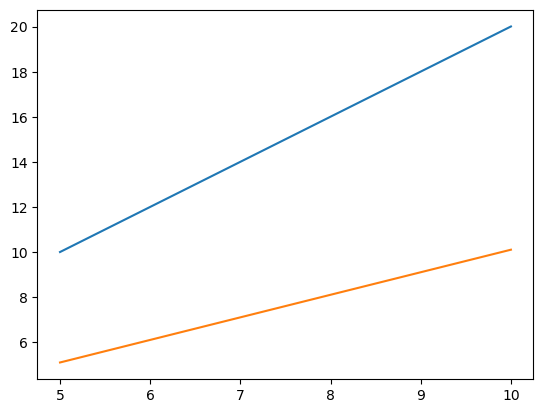

In [65]:
import matplotlib.pyplot as plt

t = [5, 8, 10]
a = [10.0046, 16.0052, 20.0052]
b = [5.1070, 8.1090, 10.1077]

fig, ax = plt.subplots()
ax.plot(t, a, label="Sequential")
ax.plot(t, b, label="Concurrent")

plt.show()


**Task 7.6**


1.   The figure below shows the total runtime I observed when `process_time` is reduced to much lower values.
2.   **Review Quiz Q5**: Comment on why the parallel programme become slower compared to the sequential programme at smaller values of `process_time`?



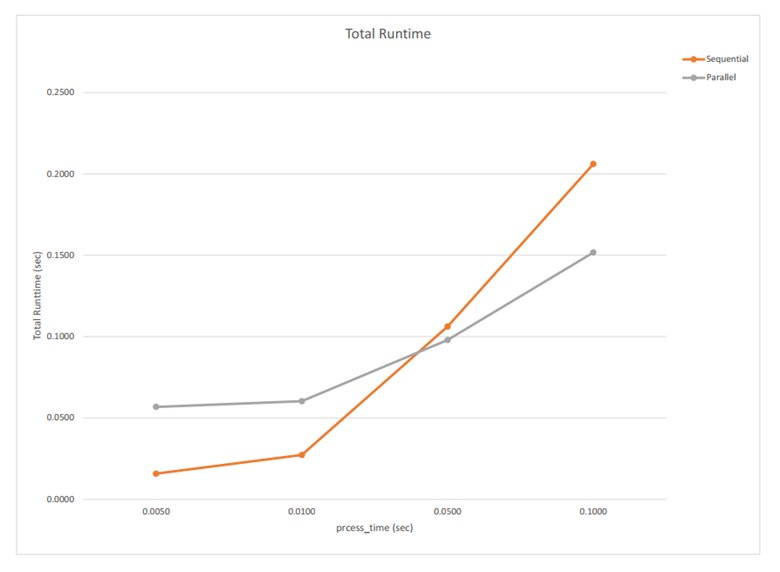
